# **Task 1 - Table Booking and Online Delivery**


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(r'C:\Users\Ashish Mishra\OneDrive\Desktop\Data Science\Dataset.csv')

In [24]:
df.fillna({'Has Table booking': 'No', 'Has Online delivery': 'No', 'Aggregate rating': 0, 'Price range': df['Price range'].median()}, inplace=True)

In [25]:
total = len(df)
table_booking_percent = (df['Has Table booking'].value_counts(normalize=True)['Yes'] * 100)
online_delivery_percent = (df['Has Online delivery'].value_counts(normalize=True)['Yes'] * 100)

In [26]:
avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

In [27]:
online_delivery_distribution = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

In [28]:
print(f"\n=== Results ===")
print(f"1. Table booking: {table_booking_percent:.2f}%")
print(f"2. Online delivery: {online_delivery_percent:.2f}%")
print(f"3. Avg rating (table): {avg_rating_with_table:.2f}")
print(f"4. Avg rating (no table): {avg_rating_without_table:.2f}")


=== Results ===
1. Table booking: 12.12%
2. Online delivery: 25.66%
3. Avg rating (table): 3.44
4. Avg rating (no table): 2.56


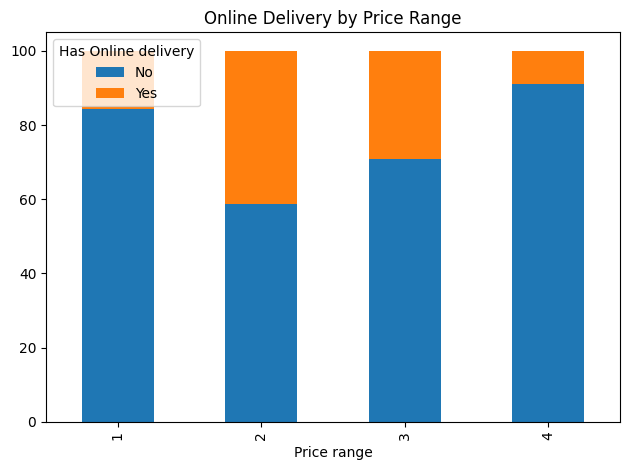

In [29]:
online_delivery_distribution.plot(kind='bar', stacked=True)
plt.title('Online Delivery by Price Range')
plt.tight_layout()
plt.show()

# **Task 2 - Price Range Analysis**


In [30]:
df['Aggregate rating'] = df['Aggregate rating'].fillna(0)
df['Price range'] = df['Price range'].fillna(df['Price range'].median())

In [31]:
most_common_price_range = df['Price range'].mode()[0]

In [32]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

In [33]:
highest_avg_rating_price_range = avg_rating_by_price_range.idxmax()
highest_avg_rating = avg_rating_by_price_range.max()

In [34]:
print("\n=== Price Range Analysis ===")
print(f"1. Most common price range: {most_common_price_range}")
print("2. Average rating by price range:")
print(avg_rating_by_price_range)
print(f"3. Price range with highest average rating: {highest_avg_rating_price_range} ({highest_avg_rating:.2f})")


=== Price Range Analysis ===
1. Most common price range: 1
2. Average rating by price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
3. Price range with highest average rating: 4 (3.82)


# **Task 3 - Feature Engineering**


In [35]:
def extract_features(data):
    data['Name Length'] = data['Restaurant Name'].apply(len)
    data['Address Length'] = data['Address'].apply(len)
    return data

In [36]:
df = extract_features(df)

In [37]:
def encode_categorical_features(data):
    data['Has Table Booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
    data['Has Online Delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})
    return data
df = encode_categorical_features(df)

In [38]:
print("\n=== Updated DataFrame with New Features ===")
print(df[['Restaurant Name', 'Name Length', 'Address', 'Address Length', 'Has Table Booking', 'Has Online Delivery']].head())


=== Updated DataFrame with New Features ===
          Restaurant Name  Name Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address Length  \
0  Third Floor, Century City Mall, Kalayaan Avenu...              71   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64   

   Has Table Booking  Has Online Delivery  
0                  1                    0  
1                  1                    0  
2                  1                    0  
3                  0                    0  
4                  1                    0  
